In [1757]:
#Importing the necessary libraries

from sodapy import Socrata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams["font.size"] = 14

Inpatient Psychiatric Facility Quality Measure Data – by Facility

COMMUNITY Hospital Compare

Psychiatric facilities that are eligible for the Inpatient Psychiatric Facility Quality Reporting (IPFQR) 
program are required to meet all program requirements, otherwise their Medicare payments may be reduced. 

Follow-Up After Hospitalization for Mental Illness (FUH) measure data on this table are marked as not available. 
Results for this measure are provided on a separate table.

df dimensions are: (1653 by 93)

Common Core
Publisher	Centers for Medicare & Medicaid Services (CMS)
Contact Name	Hospital Compare
Contact Email	HospitalCompare@lantanagroup.com
Bureau Code	009:38
Program Code	009:078
Topics
Category	Hospital Compare
Tags	
hospital compare, timely and effective care, psych, facility

(All of this is from data.medicare.gov)

## Calling the first API 

In [1758]:
# Unauthenticated client only works with public data sets. 
client = Socrata("data.medicare.gov", None)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("q9vs-r7wp", limit=2000)

# Convert to pandas DataFrame
qmd_df = pd.DataFrame.from_records(results)

#https://data.medicare.gov/resource/v7vx-dht4.json

In [1759]:
qmd_df.shape

(1653, 93)

 I decided to remove the footnotes columns, as they were unnecessary.
 The footnotes usually fell into one of three categories: 
     1. Number of cases is too few to report
     2. No results were available for the specific reporting period, or
     3. No cases met the criteria for such a measure
 Repeatitive and unnecessary data colums were also removed, such as address, city, county name, etc.
 "fuh_30" and "fuh_7" were omitted, as they are covered in the "fuh" joined df.

Here, we can see the number of rows is equal to 1653, and the number of columns is equal to 93

In [1760]:

abridged_qmd_df = qmd_df[[  
       #We will be joining on the "provider_number" column
       'provider_number',
       #Physical restraint use
       'hbips_2_overall_num',
       #'hbips_2_overall_den',
       'hbips_2_overall_rate_per_1000',
       #Hours of seclusion
       'hbips_3_overall_num', 
       #'hbips_3_overall_den',
       'hbips_3_overall_rate_per_1000', 
       #Patients discharged on multiple antipsychotic medication with Justification
       'hbips_5_overall_num',
       #'hbips_5_overall_den',
       'hbips_5_overall__of_total',
       #Alcohol use screening
       'sub_1_numerator', 
       #'sub_1_denominator',
       'sub_1_',
       #Tobacco use screening
       'tob_1_numerator', 
       #'tob_1_denominator', 
       'tob_1_'
    ]]

In [1761]:
abridged_qmd_df.shape

(1653, 11)

In [1762]:
#renaming the columns of the abridged Quality Measure Data
abridged_qmd_df.columns = [

       "provider_number",
       "pr_num",
       #"pr_den",
       "pr_rate_per_1000",
       "seclusion_num", 
       #"seclusion_den",
       "seclusion_rate_per_1000", 
       "antipsychotics_num",
       #"antipsychotics_den",
       "antipsychotics_percentage",
       "alcohol_num", 
       #"alchol_den",
       "alcohol_percentage",
       "tobacco_num", 
       #"tobacco_den", 
       "tobacco_percentage"

]

rn_qmd_df = abridged_qmd_df

Inpatient Psychiatric Facility Follow-Up After Hospitalization for Mental Illness (FUH) Quality Measure Data 
– by Facility


Psychiatric facilities that are eligible for the Inpatient Psychiatric Facility Quality Reporting (IPFQR) program are
required to meet all program requirements, otherwise their Medicare payments may be reduced. 
This table contains recalculated Follow-Up After Hospitalization for Mental Illness (FUH) measure data.



(1655 by 25)



Common Core
Contact Name	Hospital Compare
Contact Email	HospitalCompare@lantanagroup.com
Bureau Code	009:38
Program Code	009:000
Topics
Category	Hospital Compare

(Again, all of this is from data.medicare.gov)

## Calling the second API

In [1763]:
# Unauthenticated client only works with public data sets.
client = Socrata("data.medicare.gov", None)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.

results2 = client.get("icmf-9iaa", limit=2000)

# Convert to pandas DataFrame
fuh_df = pd.DataFrame.from_records(results2)

#https://data.medicare.gov/resource/icmf-9iaa.json

In [1764]:
fuh_df.shape

(1655, 25)

## Emailing the online support center: data.medicare.gov 

Here, we can see that the number of columns is 25, HOWEVER, the number of rows is equal to 1655, 2 more than the previous dataframe... Why is that? After emailing the online support center for data.medicare.gov, I received the following explanation:

Response Via Email (Jan Fredericksen)	02/13/2019 08:43 AM

"The providers listed in the data posted on the Hospital Compare site may vary based on the timing of the creation of the file and the source of the data. The FUH measure data are calculated separately by CMS and do not require providers to submit data; therefore, the list of participating IPFs at the time the files were finalized differed slightly. Providers are identified by their CMS Certification Number, referred to as “Provider_Number” in the file."

### So the difference is due to the separate calculation of the two data sets, and the same number of providers are not required to submit data. The email also shows that we will be joining on the column "Provider_Number," as it is the unique key.

# N.B. The collection period for the data is, effectively, 7/01/2015 -- 6/30/2016

In [1765]:
# I decided to remove the footnotes columns, as they were largely unnecessary.
# See above for the reasons for missing data
# Repeatitive and unnecessary data colums were also removed, such as address, city, county name, etc.
# "fuh_30" and "fuh_7" are now present, as they were absent in the previous dataframe

abridged_fuh_df = fuh_df[
    [
     #we will be joining on "provider_number"
     "provider_number", 
     # Percent of patients receiving follow-up care within 30 days (FUH-30) 
     "fuh_30_numerator", 
     #"fuh_30_denominator",
     "fuh_30_",
     # or within 7 days (FUH-7) after hospitalization for mental illness
     "fuh_7_numerator", 
     #"fuh_7_denominator",
     "fuh_7_", 
     #omitted from last data frame
     "state"     
    ]]

In [1766]:
abridged_fuh_df.shape

(1655, 6)

In [1767]:
#renaming the Follow up after Hospitalization df 
abridged_fuh_df.columns = [
     #we will be joining on "pn"
     "provider_number",
     # Percent of patients receiving follow-up care within 30 days (FUH-30) 
     "followup_30_num", 
     #"followup_30_den",
     "followup_30_percentage",
     # or within 7 days (FUH-7) after hospitalization for mental illness
     "followup_7_num", 
     #"followup_7_den",
     "followup_7_percentage", 
     #omitted from last data frame
     "state" 
    ]
#renaming the df
rn_fuh_df = abridged_fuh_df

## Merging the two dataframes on "provider_number"

In [1768]:
#Merging the API dataframes, using the provider_number" column as the linking key
merged_df = pd.merge(rn_qmd_df, rn_fuh_df, how='left', on= "provider_number", left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate= None)

In [1769]:
merged_df.shape

(1653, 16)

In [1801]:
class Removal:
    def __init__(self, c):
        self.c = c
    def __cleaner__(self, c):
        if c == "Not Available":
            return self.np.NaN 
        else:
            return self.float(re.sub("%", "", c))
    def __nancleaner__(self, c):
        if c == "Not Available":
            return self.np.NaN
        else: 
            return self.float(c)
    def __strip_percentage__(self, p):
        return self.re.sub("%", "", p)

## Now, some "user-defined" functions in order to facilitate cleaning up the data into floats so that we can actually perform calculations on it

In [1770]:
# This function helps if there are both percentage signs and "Not Available" values, which are not NaN's because
# they are literally text values.
def cleaner(c):
    if c == "Not Available":
        return np.NaN 
    else:
        return float(re.sub("%", "", c))
        

In [1771]:
# This function cleans "Not Available" to NaN values, without there being percentages present.
def nancleaner(c):
    if c == "Not Available":
        return np.NaN
    else: 
        return float(c)

In [1772]:
# This function will strip the percentages from columns with such values
def strip_percentage(p):
    return re.sub("%", "", p) 

In [1773]:
#Just seeing what I can convert before we use the functions
merged_df2 = merged_df.apply(pd.to_numeric, errors='ignore')

In [1774]:
merged_df2.dtypes

provider_number                int64
pr_num                       float64
pr_rate_per_1000             float64
seclusion_num                 object
seclusion_rate_per_1000      float64
antipsychotics_num            object
antipsychotics_percentage    float64
alcohol_num                   object
alcohol_percentage            object
tobacco_num                   object
tobacco_percentage            object
followup_30_num               object
followup_30_percentage        object
followup_7_num                object
followup_7_percentage         object
state                         object
dtype: object

OK, so we still need to convert several columns to floats. No worries!


In [1775]:
# removing the "%" signs, putting in Nan's for "Not Available" and "floating" values 
merged_df2["alcohol_percentage"] = merged_df2["alcohol_percentage"].map(cleaner)
merged_df2["tobacco_percentage"] = merged_df2["tobacco_percentage"].map(cleaner)

In [1776]:
#putting in NaN's for "Not Available", and "floating" values
merged_df2["seclusion_num"] = merged_df2["seclusion_num"].map(lambda c: nancleaner(c))
merged_df2["antipsychotics_num"] = merged_df2["antipsychotics_num"].map(lambda c: nancleaner(c))
merged_df2["antipsychotics_percentage"] = merged_df2["antipsychotics_percentage"].map(lambda c: nancleaner(c))
merged_df2["alcohol_num"] = merged_df2["alcohol_num"].map(lambda c: nancleaner(c))
merged_df2["tobacco_num"] = merged_df2["tobacco_num"].map(lambda c: nancleaner(c))
merged_df2["followup_30_num"] = merged_df2["followup_30_num"].map(lambda c: nancleaner(c))
merged_df2["followup_30_percentage"] = merged_df2["followup_30_percentage"].map(lambda c: nancleaner(c))
merged_df2["followup_7_num"] = merged_df2["followup_7_num"].map(lambda c: nancleaner(c))
merged_df2["followup_7_percentage"] = merged_df2["followup_7_percentage"].map(lambda c: nancleaner(c))

In [1777]:
merged_df2.dtypes

provider_number                int64
pr_num                       float64
pr_rate_per_1000             float64
seclusion_num                float64
seclusion_rate_per_1000      float64
antipsychotics_num           float64
antipsychotics_percentage    float64
alcohol_num                  float64
alcohol_percentage           float64
tobacco_num                  float64
tobacco_percentage           float64
followup_30_num              float64
followup_30_percentage       float64
followup_7_num               float64
followup_7_percentage        float64
state                         object
dtype: object

In [1778]:
merged_df2.shape

(1653, 16)

## Great! It appears that all the appropriate values are floats, ready for numerical analysis. Now, let's check the nulls in order to see how many we have and what we can do with them: 

In [1779]:
merged_df2.isnull().sum()

provider_number                0
pr_num                        18
pr_rate_per_1000              38
seclusion_num                 18
seclusion_rate_per_1000       44
antipsychotics_num           816
antipsychotics_percentage    890
alcohol_num                   74
alcohol_percentage            74
tobacco_num                   62
tobacco_percentage            62
followup_30_num              314
followup_30_percentage       314
followup_7_num               512
followup_7_percentage        512
state                          2
dtype: int64

# lots of null values... Remember that this is published data, so...

##   1.We can't really delete the values and have a reliable analysis. 
##   2.We cannot collect more data, as the collecting period is over, and, 
##   3.We wouldn't be able to resample the population, let alone followup with the data authority. so...


### I propose some form of imputation!

But first, just a quick percentage check:

In [1802]:
(merged_df2.notnull().sum() / 1653)*100

provider_number              100.000000
pr_num                        98.911071
pr_rate_per_1000              97.701149
seclusion_num                 98.911071
seclusion_rate_per_1000       97.338173
antipsychotics_num            50.635209
antipsychotics_percentage     46.158500
alcohol_num                   95.523291
alcohol_percentage            95.523291
tobacco_num                   96.249244
tobacco_percentage            96.249244
followup_30_num               81.004235
followup_30_percentage        81.004235
followup_7_num                69.026013
followup_7_percentage         69.026013
state                         99.879008
dtype: float64

### For psychotropic medications, roughly half of the data is missing, and I think we wouldn't be able to make fair inferences on those things by deleting or imputing. The same concept goes for the followup data.



Text(0,0.5,'% of Data Missing')

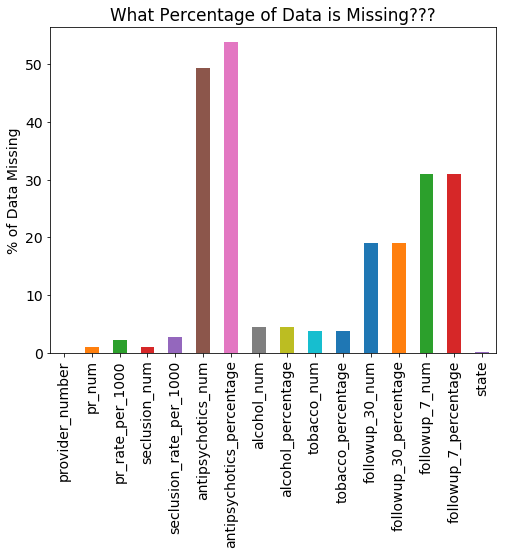

In [1781]:
((merged_df2.isnull().sum() / 1653)*100).plot(kind = "bar")
plt.title("What Percentage of Data is Missing???")
plt.ylabel("% of Data Missing")

In [1782]:
# df name change
cleaned_df = merged_df2

## Imputing values (mean)

In [1783]:
# Dropping the two states that have na values
cleaned_df = cleaned_df.dropna(how = "any", subset = ["state"], inplace = False)
# imputing mean values
cleaned_df = cleaned_df.fillna(value = {"pr_num":cleaned_df["pr_num"].mean()})
cleaned_df = cleaned_df.fillna(value = {"pr_rate_per_1000":cleaned_df["pr_rate_per_1000"].mean()})
cleaned_df = cleaned_df.fillna(value = {"seclusion_num":cleaned_df["seclusion_num"].mean()})
cleaned_df = cleaned_df.fillna(value = {"seclusion_rate_per_1000":cleaned_df["seclusion_rate_per_1000"].mean()})
cleaned_df = cleaned_df.fillna(value = {"alcohol_num":cleaned_df["alcohol_num"].mean()})
cleaned_df = cleaned_df.fillna(value = {"alcohol_percentage":cleaned_df["alcohol_percentage"].mean()})
cleaned_df = cleaned_df.fillna(value = {"tobacco_num":cleaned_df["tobacco_num"].mean()})
cleaned_df = cleaned_df.fillna(value = {"tobacco_percentage":cleaned_df["tobacco_percentage"].mean()})
#cleaned_df = cleaned_df.fillna(value = {"followup_30_num":cleaned_df["followup_30_num"].mean()})
#cleaned_df = cleaned_df.fillna(value = {"followup_7_num":cleaned_df["followup_7_num"].mean()})




In [1784]:
cleaned_df.isnull().sum()

provider_number                0
pr_num                         0
pr_rate_per_1000               0
seclusion_num                  0
seclusion_rate_per_1000        0
antipsychotics_num           814
antipsychotics_percentage    888
alcohol_num                    0
alcohol_percentage             0
tobacco_num                    0
tobacco_percentage             0
followup_30_num              312
followup_30_percentage       312
followup_7_num               510
followup_7_percentage        510
state                          0
dtype: int64

We lost two rows by deleting the "state" na values, but that's probably a good thing because we lost 2 na values for the remaining columns.

## question 1: "which states "restrained" the most people?

In [1785]:
# the total number of people "restrained" in the participating hospitals
cleaned_df["pr_num"].sum()

264519.6453577982

In [1786]:
#"Top Ten" states with respect to restraint
cleaned_df[["state", "pr_num"]].groupby(by = "state").sum().sort_values("pr_num", ascending = False).head(10)

,pr_num
state,
MI,23443.300000
IN,20327.800000
NY,19463.600000
CA,19406.827835
IL,15378.777835
WA,15222.077835
PA,13685.057835
TN,13063.000000
FL,9454.100000


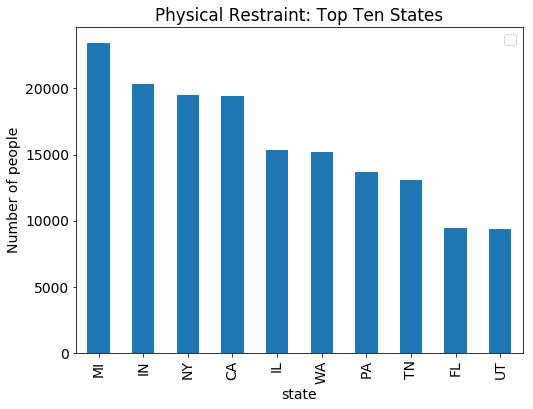

In [1787]:
cleaned_df[["state", "pr_num"]].groupby(by = "state").sum().sort_values("pr_num", ascending = False).head(10).plot(kind = "bar")
plt.ylabel("Number of people")
plt.title("Physical Restraint: Top Ten States")
plt.legend("")

In [1788]:
# percent of those restrained that each state restrained, "Top Ten"
((cleaned_df[["state", "pr_num"]].groupby(by = "state").sum().sort_values("pr_num", ascending = False) \
/ cleaned_df["pr_num"].sum()).head(10)*100)

,pr_num
state,
MI,8.862593
IN,7.684798
NY,7.358092
CA,7.336630
IL,5.813851
WA,5.754611
PA,5.173551
TN,4.938386
FL,3.574063


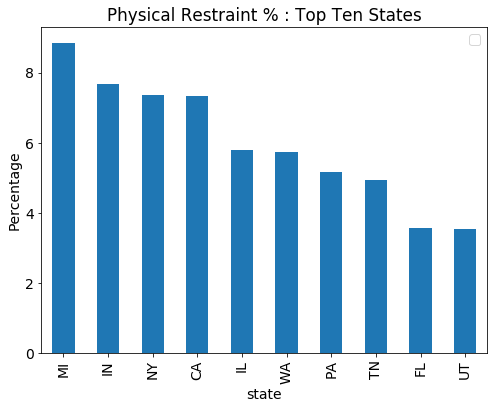

In [1789]:
(((cleaned_df[["state", "pr_num"]].groupby(by = "state").sum().sort_values("pr_num", ascending = False) \
/ cleaned_df["pr_num"].sum()).head(10))*100).plot(kind = "bar") 
plt.ylabel("Percentage")
plt.title("Physical Restraint % : Top Ten States")
plt.legend("")

## question 2: "which states "secluded" the most people?

In [1790]:
# Total number of people to seclusion
cleaned_df["seclusion_num"].sum()

173880.95710091744

In [1791]:
#"Top Ten" states for seclusion over the measurement period
cleaned_df[["state", "seclusion_num"]].groupby(by = "state").sum().sort_values("seclusion_num", ascending = False).head(10)

,seclusion_num
state,
WA,28338.058569
CA,12355.478569
PA,9616.988569
NY,9595.450000
OH,9412.490000
OR,7920.188569
IA,6119.710000
MN,5748.347138
ND,5623.060000


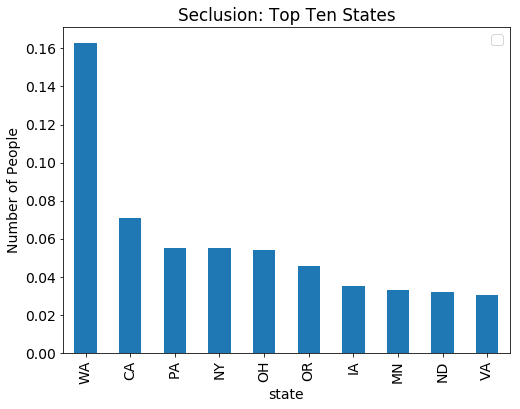

In [1792]:
((cleaned_df[["state", "seclusion_num"]].groupby(by = "state").sum().sort_values("seclusion_num", ascending = False) \
/ cleaned_df["seclusion_num"].sum()).head(10)).plot(kind = "bar") 
plt.ylabel("Number of People")
plt.title("Seclusion: Top Ten States")
plt.legend("")

In [1793]:
# percent of those restrained that each state secluded, "Top Ten"
((cleaned_df[["state", "seclusion_num"]].groupby(by = "state").sum().sort_values("seclusion_num", ascending = False) \
/ cleaned_df["seclusion_num"].sum()).head(10)*100)

,seclusion_num
state,
WA,16.297390
CA,7.105711
PA,5.530789
NY,5.518402
OH,5.413180
OR,4.554949
IA,3.519483
MN,3.305910
ND,3.233856


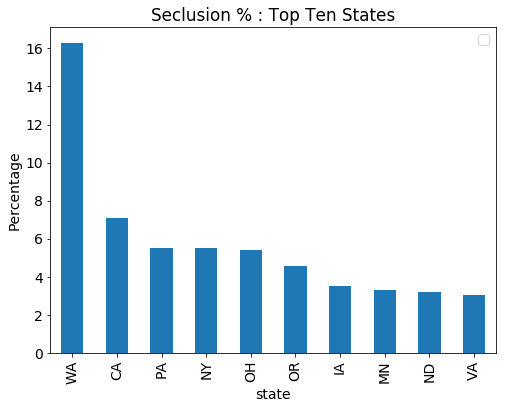

In [1794]:
(((cleaned_df[["state", "seclusion_num"]].groupby(by = "state").sum().sort_values("seclusion_num", ascending = False) \
/ cleaned_df["seclusion_num"].sum()).head(10))*100).plot(kind = "bar") 
plt.ylabel("Percentage")
plt.title("Seclusion % : Top Ten States")
plt.legend("")

### Wow... Apparently, Washington state had about 16% of all instances of seclusion, more than twice the number two state, California, which had 7% of all instances of seclusion.

# WARNING: Pie Chart...Coming right up, right now!

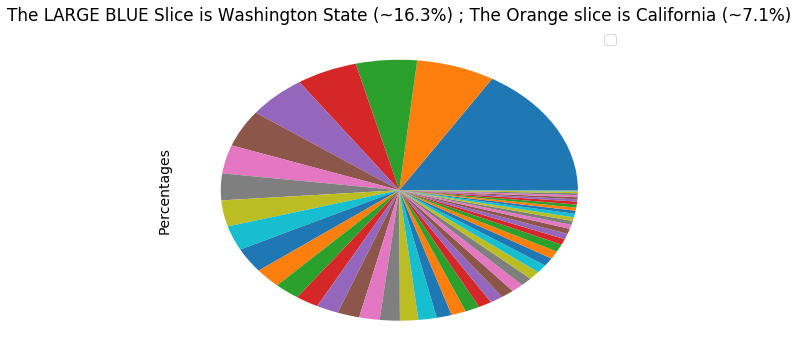

In [1805]:
plt.pie(
(((cleaned_df[["state", "seclusion_num"]].groupby(by = "state").sum().sort_values("seclusion_num", ascending = False) \

   / cleaned_df["seclusion_num"].sum()))*100))


plt.ylabel("Percentages")
plt.title("The LARGE BLUE Slice is Washington State (~16.3%) ; The Orange slice is California (~7.1%)")
plt.legend("")




## Thanks so much, and I hope you enjoyed the presentation!